## Assignment 2 Submission

Name: Thapakorn PIPATPAJONG

Student ID: 1011844514

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

#### Answer:

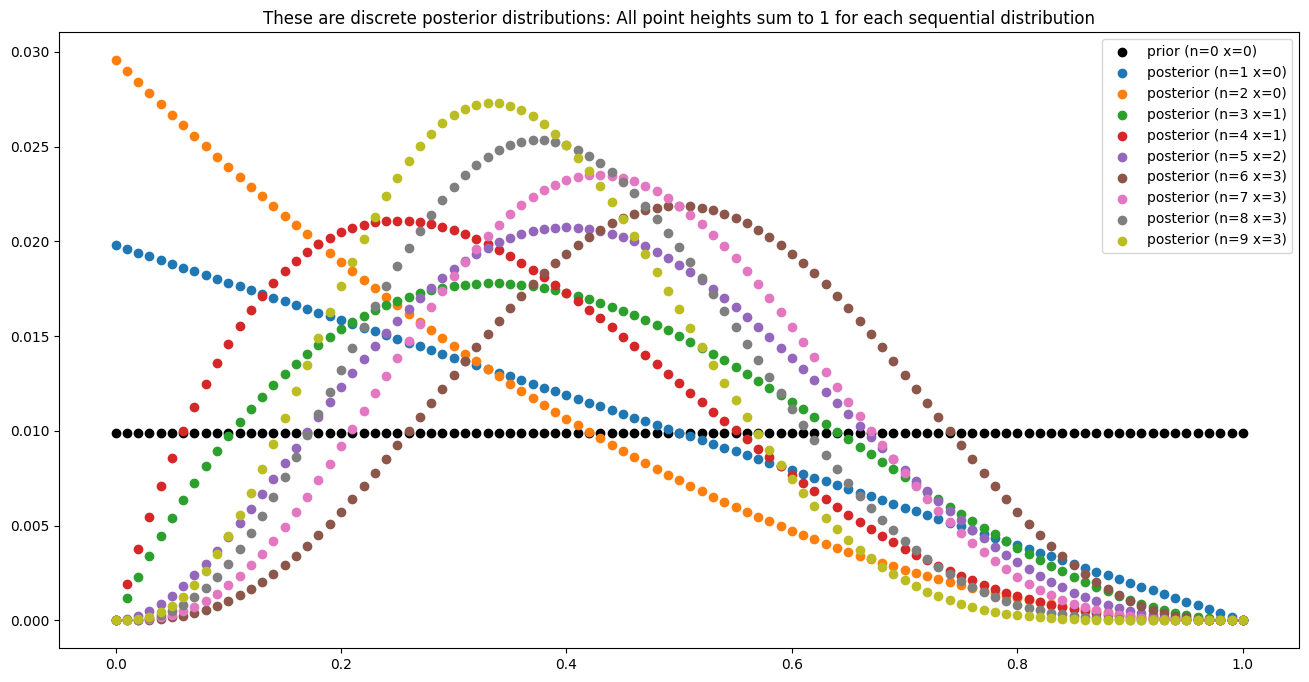

In [1]:
# Q1
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    # use these for batch updates based on a binomial distribution
    posterior = [(p/100)**x * (1-p/100)**(n-x) for p in range(101)]
    summation = sum(posterior)
    posterior = [x/summation for x in posterior]
    
    # or do updates in a truly sequential manner using Bernoulli
    # prior = posterior  # for each Bernoulli observation update
    
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

#### Answer:

1. The kernel of posteriors have similar form to the one in beta distribution. Therefore, the posteriors $\theta_j \sim Beta(x_j^{(t)}+\alpha_j, n_j^{(t)}-x_j^{(t)}+\beta_j)$ for every $j$.

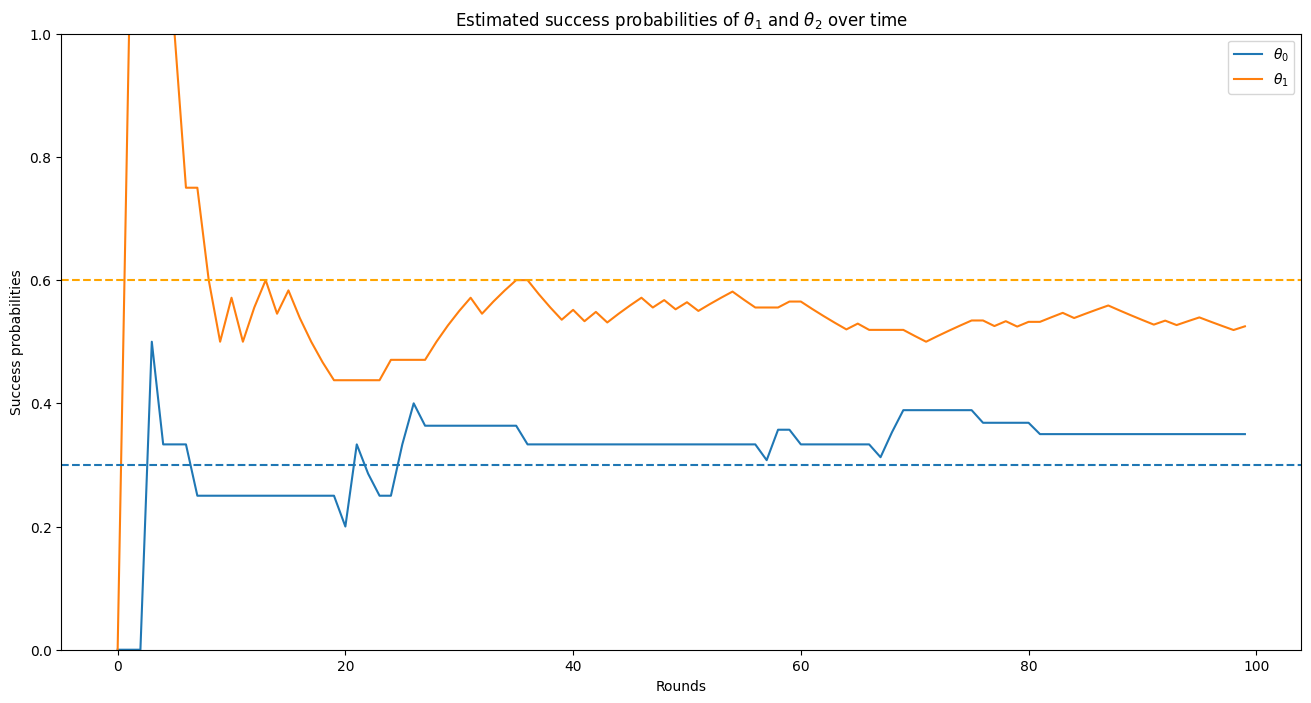

In [2]:
import random

m = 100
n = [0, 0] # number of trials in theta1 and theta2
x = [0, 0] # number of successful trials in theta1 and theta2
alpha = beta = 1
true_val = [0.3, 0.6]
est_theta = [[], []] # posterior mean, or success probabilities

for t in range(m):
    chosen_arm = 0
    sample1 = stats.beta(alpha + x[0], beta + n[0] - x[0]).rvs()
    sample2 = stats.beta(alpha + x[1], beta + n[1] - x[1]).rvs()
    if sample1 > sample2:
        chosen_arm = 0
    else:
        chosen_arm = 1
    x[chosen_arm] += stats.binom(n = 1, p = true_val[chosen_arm]).rvs()
    n[chosen_arm] += 1
    est_theta[0].append(x[0]/np.where(n[0] == 0, 1, n[0]))
    est_theta[1].append(x[1]/np.where(n[1] == 0, 1, n[1]))
    # est_theta[0].append((alpha + x[0])/(beta + n[0]))
    # est_theta[1].append((alpha + x[1])/(beta + n[1]))

plt.figure(figsize = (16, 8))
plt.plot(est_theta[0], label = f"$\\theta_0$")
plt.plot(est_theta[1], label = f"$\\theta_1$")
plt.axhline(true_val[0], linestyle = "--")
plt.axhline(true_val[1], linestyle = "--", color = "orange")
plt.ylim((0,1))
plt.title("Estimated success probabilities of $\\theta_1$ and $\\theta_2$ over time")
plt.xlabel("Rounds")
plt.ylabel("Success probabilities")
plt.legend()

We can see that the posterior distributions $\theta_1$ and $\theta_2$ are separated further from each other in each iteration.

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

#### Answer:

Analysis 1 (Beta-Binomial)

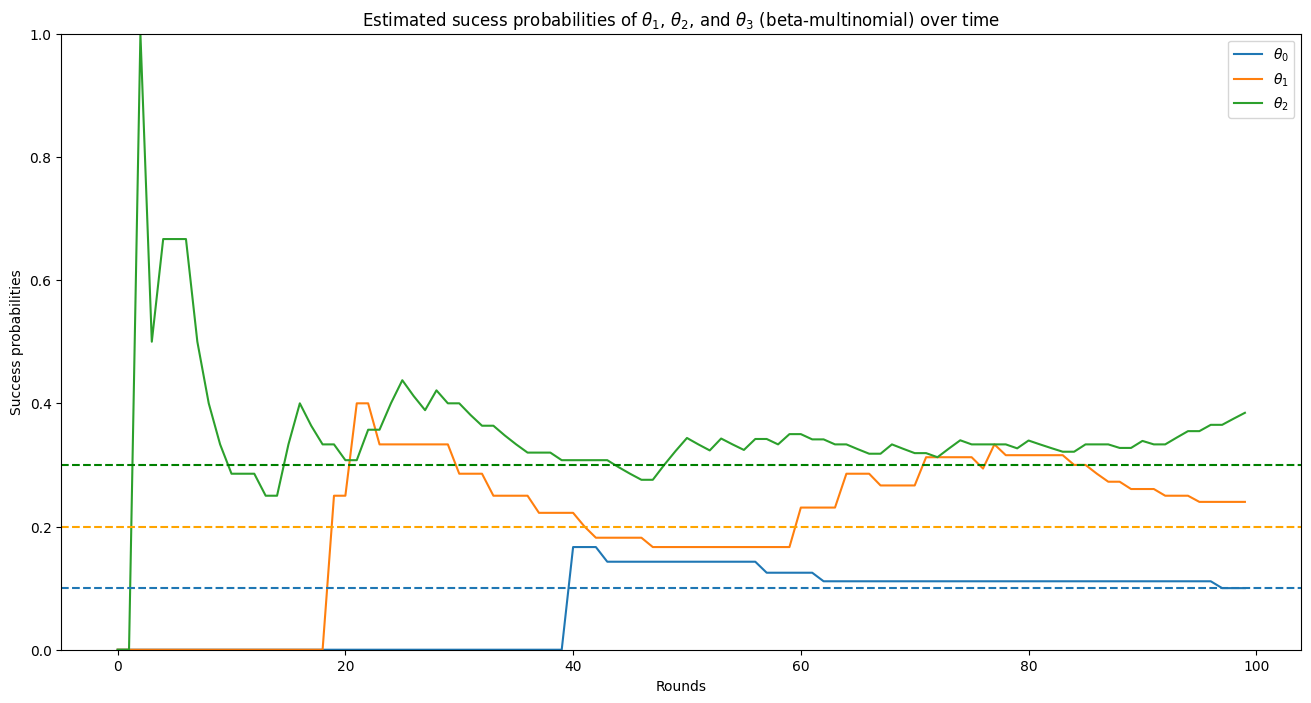

In [3]:
import random

m = 100
n = [0, 0, 0] # number of trials in theta1 and theta2
x = [0, 0, 0] # number of successful trials in theta1 and theta2
alpha = beta = 1
true_val = [0.1, 0.2, 0.3]
est_theta = [[], [], []] # estimate value of theta1 and theta2, i.e., the mean of the posterior distribution

for t in range(m):
    sample = stats.beta(np.ones(len(true_val))*alpha + x, np.ones(len(true_val))*beta + n - x).rvs()
    chosen_arm = np.argmax(sample)
    x[chosen_arm] += stats.binom(n = 1, p = true_val[chosen_arm]).rvs()
    n[chosen_arm] += 1
    est_theta[0].append(x[0]/np.where(n[0] == 0, 1, n[0]))
    est_theta[1].append(x[1]/np.where(n[1] == 0, 1, n[1]))
    est_theta[2].append(x[2]/np.where(n[2] == 0, 1, n[2]))
    # est_theta[0].append((alpha + x[0]) / (beta + n[0]))
    # est_theta[1].append((alpha + x[1]) / (beta + n[1]))
    # est_theta[2].append((alpha + x[2]) / (beta + n[2]))

plt.figure(figsize = (16, 8))
plt.plot(est_theta[0], label = f"$\\theta_0$")
plt.plot(est_theta[1], label = f"$\\theta_1$")
plt.plot(est_theta[2], label = f"$\\theta_2$")
plt.axhline(true_val[0], linestyle = "--")
plt.axhline(true_val[1], linestyle = "--", color = "orange")
plt.axhline(true_val[2], linestyle = "--", color = "green")
plt.ylim((0,1))
plt.title("Estimated sucess probabilities of $\\theta_1$, $\\theta_2$, and $\\theta_3$ (beta-multinomial) over time")
plt.xlabel("Rounds")
plt.ylabel("Success probabilities")
plt.legend()

Analysis 2 (Dirichlet-Multinomial)

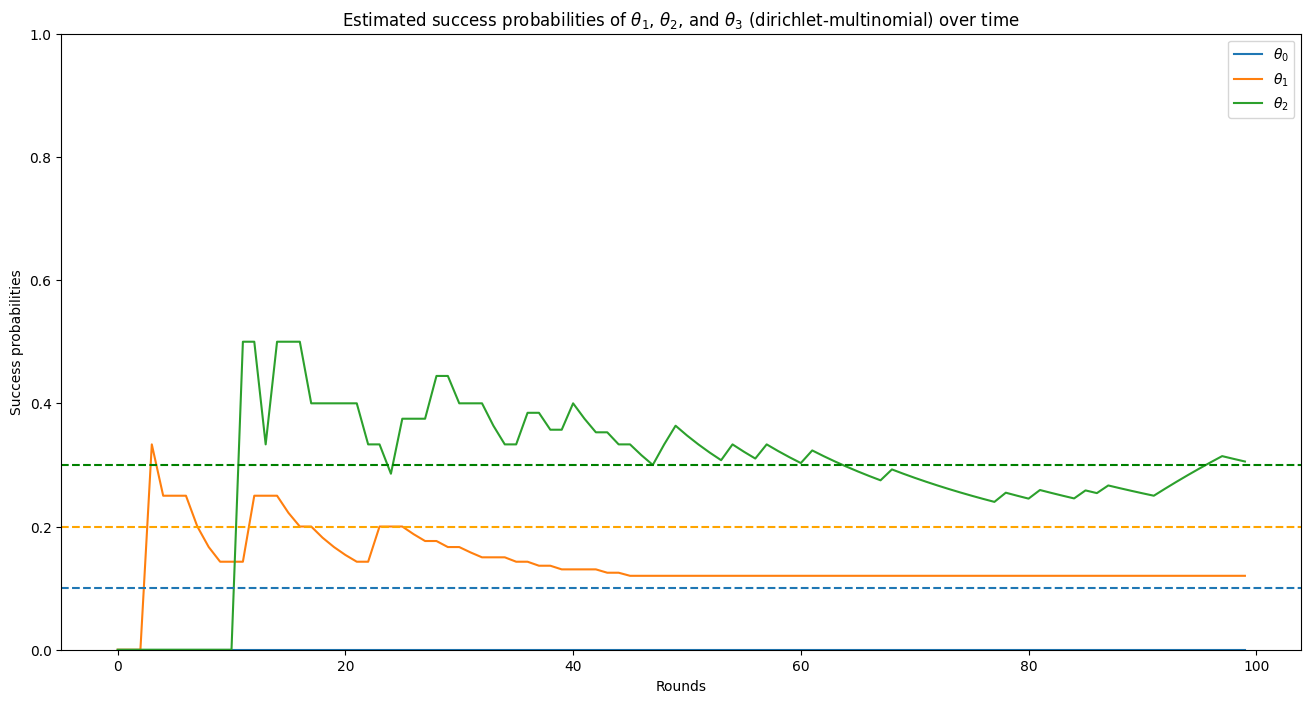

In [16]:
m = 100
n = [0, 0, 0] # number of trials in theta1 and theta2
x = [0, 0, 0] # number of successful trials in theta1 and theta2
true_val = [0.1, 0.2, 0.3]
alpha = np.ones(len(true_val))
est_theta = [[], [], []] # estimate value of theta1 and theta2, i.e., the mean of the posterior distribution

for t in range(m):
    # print(f"t = {t}, alpha+x = {alpha+x}")
    sample = stats.dirichlet(alpha + x).rvs()[0]
    chosen_arm = np.argmax(sample)
    # print(f"Choose arm {chosen_arm+1}")
    x[chosen_arm] += stats.binom(n = 1, p = true_val[chosen_arm]).rvs()
    n[chosen_arm] += 1
    for i in range(len(true_val)):
        est_theta[i].append(x[i]/np.where(n[i] == 0, 1, n[i]))
        # est_theta[i].append((alpha+x)[i] / sum(alpha+x))

plt.figure(figsize = (16, 8))
plt.plot(est_theta[0], label = f"$\\theta_0$")
plt.plot(est_theta[1], label = f"$\\theta_1$")
plt.plot(est_theta[2], label = f"$\\theta_2$")
plt.axhline(true_val[0], linestyle = "--")
plt.axhline(true_val[1], linestyle = "--", color = "orange")
plt.axhline(true_val[2], linestyle = "--", color = "green")
plt.ylim((0,1))
plt.title("Estimated success probabilities of $\\theta_1$, $\\theta_2$, and $\\theta_3$ (dirichlet-multinomial) over time")
plt.xlabel("Rounds")
plt.ylabel("Success probabilities")
plt.legend()

There is no clear analysis that will always perform better than another. Both of these analyses will have advantage over another in some circumstances

- Beta-Binomial model: This model is simple, fast, and easy to implement to perform Bayesian multi-armed bandit (MAB). However, this model assumes that each head are **independent** with each other, which may be inappropriate in real-world scenario, where there are some correlation between each choice.

- Dirichlet-Multinomial model: This model is able to capture certain **dependencies** between each head, making it more practical to use. Moreover, the model converges faster than the Beta-Binomial (we can clearly see that $\theta_3$ has higher probability than others in just 25 rounds), which is good when we have limited amount of data. However, with restriction of multinomial distribution, the probability of success in each category $(\theta_1, \ldots, \theta_k)$ **must add up to 1** $\left(\sum_{i=1}^k \theta_i = 1\right)$ while Beta-Binomial does not require this property since each category has its own model.

If I have to pick 1 model, I would choose Dirichlet-Multinomial model since it can handle categorical data with some dependencies better than Beta-Binomial, which is more prevalent in real-world A/B testing. The example is when user interface (UI) designer want to decide which position should they put the ads on to get as many visits as possible.

- The test will separated into **top, bottom, left, and right** category.
- In exploration phase (the first few rounds), we present the ads into different position (with equal probability) to the user to update posterior distribution
- Then, in exploitation phase, we increase the frequency of showing high visiting position ads to the user to gain more attention from the user.